# Greenhouse Gas Emissions Footprint Analysis Across Supply Chain Sectors in America

This notebook analyzes greenhouse gas (GHG) emissions across various supply chain sectors using data from `insights.db`. The goal is to uncover key insights into emissions trends, variability, and management opportunities.

In [10]:
# Importing Necessary Libraries
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Setting Visualization Style
sns.set(style='whitegrid')

# Establishing a Connection to the SQLite Database
db_path = 'insights.db'
conn = sqlite3.connect(db_path)

# Utility Function to Load Tables
def load_table(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql_query(query, conn)

# Printing All Table Names in the Database
print("Available tables in the database:")
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(table_names)

Available tables in the database:
                                   name
0                        naics_co2_2017
1                        naics_ghg_2017
2           Summary_Commodity_2010_2016
3            Summary_Industry_2010_2016
4            Detail_Commodity_2010_2016
5             Detail_Industry_2010_2016
6  categorywise_ghg_Emissions_1990_2022


In [13]:
# Sample Function to Explore and Analyze Data
def explore_table(table_name):
    print(f"\nExploring Table: {table_name}")
    
    # Load the table
    data = load_table(table_name)
    
    # Display shape and columns
    print(f"Shape: {data.shape}")
    print(f"Columns: {data.columns.tolist()}")
    
    # Check for missing values
    missing = data.isnull().sum()
    print(f"Missing Values:\n{missing[missing > 0]}")
    
    # Display sample data
    display(data.head())
    
    return data


Exploring Table: Detail_Industry_2010_2016
Shape: (11060, 13)
Columns: ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']
Missing Values:
Unnamed: 7    11060
dtype: int64


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,None,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,None,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,None,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,None,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,None,4,3,1,4,1



Exploring Table: Detail_Commodity_2010_2016
Shape: (11032, 13)
Columns: ['Commodity Code', 'Commodity Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']
Missing Values:
Unnamed: 7    11032
dtype: int64


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,None,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,None,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,None,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,None,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,None,4,3,1,4,1



Exploring Table: Summary_Commodity_2010_2016
Shape: (1848, 13)
Columns: ['Commodity Code', 'Commodity Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']
Missing Values:
Unnamed: 7    1848
dtype: int64


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,None,4,3,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,None,4,3,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,None,4,3,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,None,3,3,1,3,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,None,4,3,1,4,1



Exploring Table: Summary_Industry_2010_2016
Shape: (1848, 13)
Columns: ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']
Missing Values:
Unnamed: 7    1848
dtype: int64


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.525,0.057,0.582,None,4,3,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,None,4,3,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,None,4,3,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,None,3,3,1,3,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.232,0.024,0.256,None,4,3,1,4,1



Exploring Table: categorywise_ghg_Emissions_1990_2022
Shape: (64, 34)
Columns: ['Table 4-44:  Transportation-Related Greenhouse Gas Emissions (million metric tons of CO2 equivalent)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33']
Missing Values:
Table 4-44:  Transportation-Related Greenhouse Gas Emissions (million metric tons of CO2 equivalent)     4
Unnamed: 1                                                                                              15
Unnamed: 2                                                                                         

,Table 4-44: Transportation-Related Greenhouse Gas Emissions (million metric tons of CO2 equivalent),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,None,(R) 1990,(R) 1991,(R) 1992,(R) 1993,(R) 1994,(R) 1995,(R) 1996,(R) 1997,(R) 1998,...,(R) 2013,(R) 2014,(R) 2015,(R) 2016,(R) 2017,(R) 2018,(R) 2019,(R) 2020,(R) 2021,2022.0
1,Total transportation emissions,1524.6,1477.9,1536.8,1573.3,1627.8,1662.3,1717.7,1743.7,1785.9,...,1751.1,1785.6,1793.8,1828.8,1846.4,1876.5,1879.5,1629.5,1810.6,1807.8
2,Light-duty vehicles,648.4,623.7,628.5,623.8,619.2,614.1,614.4,608,608.5,...,405.2,415.9,405.4,406.2,392.7,398.7,395.5,341.7,374.2,369.5
3,CO2 (carbon dioxide),622.2,597.4,600.5,593.4,585.2,576.8,573.5,563.4,562.4,...,383.5,396.2,387.6,390.3,379,386.5,384.2,331.9,365,361.0
4,CH4 (methane),3.8,3.5,3.4,3.3,3.2,3.1,2.9,2.8,2.6,...,0.5,0.5,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.2



Exploring Table: naics_co2_2017
Shape: (1016, 8)
Columns: ['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Reference USEEIO Code']
Missing Values:
Series([], dtype: int64)


,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0



Exploring Table: naics_ghg_2017
Shape: (18288, 8)
Columns: ['2017 NAICS Code', '2017 NAICS Title', 'GHG', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Reference USEEIO Code']
Missing Values:
Series([], dtype: int64)


,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0


C:\Users\z004wm2f\AppData\Local\Temp\ipykernel_23340\3081506128.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Supply Chain Emission Factors with Margins', y='2017 NAICS Title',


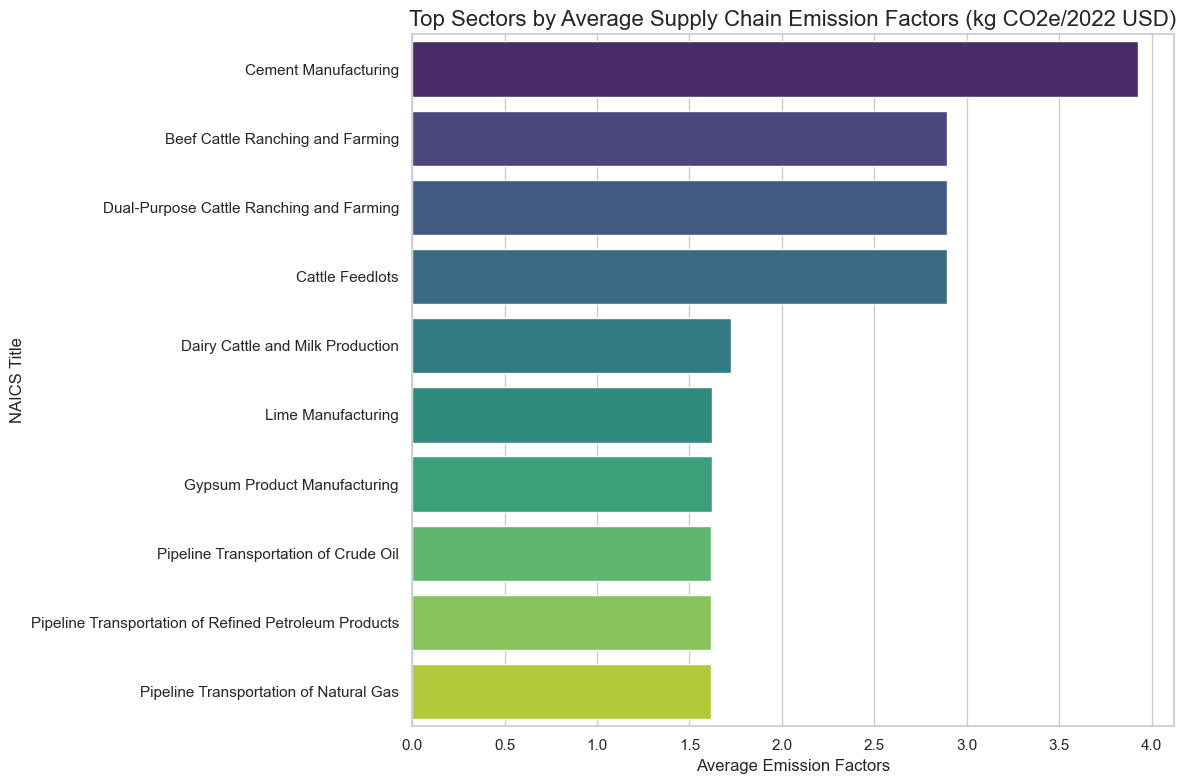

In [14]:
# Exploring Each Table in the Database
tables_to_explore = [
    "Detail_Industry_2010_2016",
    "Detail_Commodity_2010_2016",
    "Summary_Commodity_2010_2016",
    "Summary_Industry_2010_2016",
    "categorywise_ghg_Emissions_1990_2022",
    "naics_co2_2017",
    "naics_ghg_2017",
]

# Dictionary to store loaded data
data_dict = {}

for table in tables_to_explore:
    data_dict[table] = explore_table(table)

# Key Insights from `naics_co2_2017`
naics_co2_data = data_dict['naics_co2_2017']

# Insight 1: Top Sectors by Average Emissions
top_emissions_sectors = (
    naics_co2_data.groupby('2017 NAICS Title')['Supply Chain Emission Factors with Margins']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Visualization: Top Sectors by Average Emissions
plt.figure(figsize=(12, 8))
sns.barplot(x='Supply Chain Emission Factors with Margins', y='2017 NAICS Title', 
            data=top_emissions_sectors, palette='viridis')
plt.title('Top Sectors by Average Supply Chain Emission Factors (kg CO2e/2022 USD)', fontsize=16)
plt.xlabel('Average Emission Factors', fontsize=12)
plt.ylabel('NAICS Title', fontsize=12)
plt.tight_layout()
plt.show()

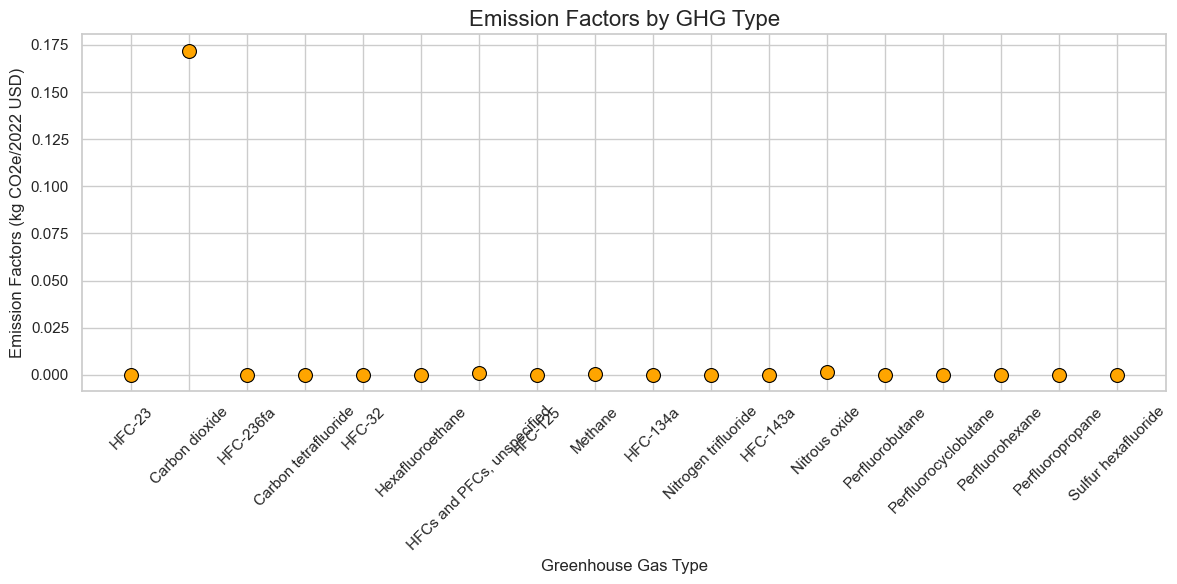

In [33]:
# Insight 2: Emission Factors by GHG Type for a specific NAICS sector (e.g., Soybean Farming)
sector_data = naics_ghg_data[naics_ghg_data['2017 NAICS Title'] == 'Soybean Farming']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='GHG', y='Supply Chain Emission Factors with Margins', data=sector_data, s=100, color='orange', edgecolor='black')
plt.title('Emission Factors by GHG Type', fontsize=16)
plt.xlabel('Greenhouse Gas Type', fontsize=12)
plt.ylabel('Emission Factors (kg CO2e/2022 USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

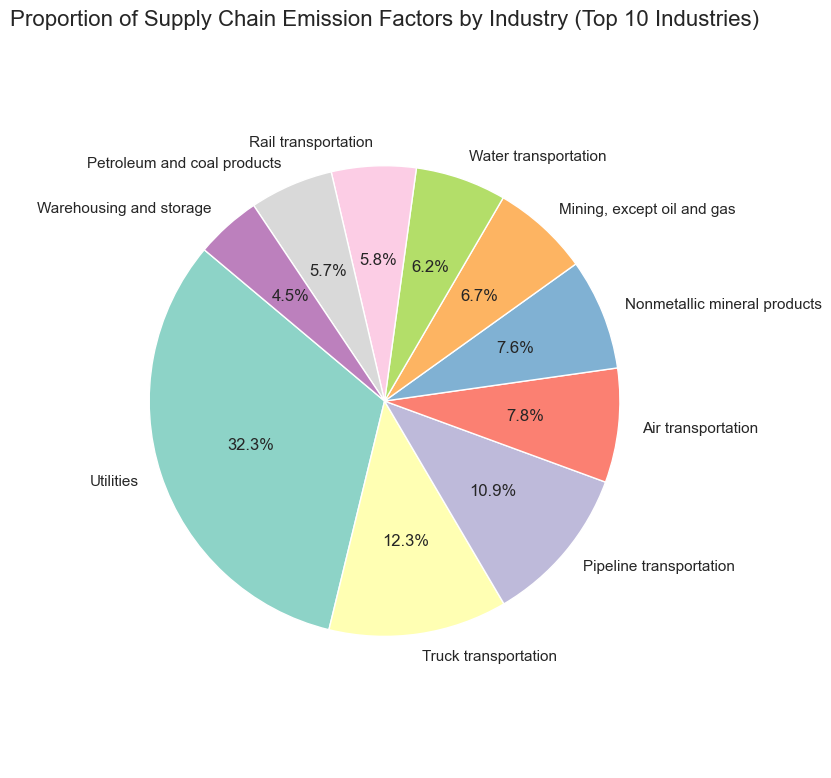

In [37]:
import matplotlib.pyplot as plt

# Load the data from the 'Summary_Industry_2010_2016' table
industry_data = data_dict['Summary_Industry_2010_2016']

# Summing the total 'Supply Chain Emission Factors with Margins' for each Industry Name
industry_emissions = industry_data.groupby('Industry Name')['Supply Chain Emission Factors with Margins'].sum().reset_index()

# Sorting industries by total emissions (descending)
industry_emissions_sorted = industry_emissions.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False)

# Select the top 10 industries with the highest emissions for clarity
top_industries = industry_emissions_sorted.head(10)

# Plotting a Pie Chart for the top 10 industries
plt.figure(figsize=(8, 8))
plt.pie(top_industries['Supply Chain Emission Factors with Margins'], 
        labels=top_industries['Industry Name'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette("Set3", len(top_industries)),
        startangle=140)

plt.title('Proportion of Supply Chain Emission Factors by Industry (Top 10 Industries)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()
